<a href="https://colab.research.google.com/github/jiyoung-99/ML_practice/blob/main/session1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# 지역에 따라서 선호하는 게임 장르가 다를까?
# 연도별 게임의 트렌드가 있을까?
# 매출이 높은 게임에 대한 분석 및 시각화 프로세스

In [4]:
url = 'https://raw.githubusercontent.com/jiyoung-99/ML_practice/main/vgames2.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
# null 값 없애기
def isFillna(df):

    df['Year'].fillna(round(df['Year'].mean(),0))
    df['Genre'].fillna('N')
    df['Publisher'].fillna('N')

    return df
# 년도 2자리 수 바꾸는 함수
def change_year(year):
    
    if year >= 0 and year <= 20:
        year += 2000
        return year
    elif year <= 99:
        year += 1900
        return year
    else:
        return year

# 2자리 바꾸는 함수 실행 함수
def do_change_year(df):
    df['Year'] = df['Year'].apply(change_year)
    return df

# thousand -> million and delete k, m
def change_km(x):
    if 'K' in x:
        return float(x.replace('K', '')) * 0.001
    
    elif 'M' in x:
        return float(x.replace('M', ''))

    else:
        return float(x)

def do_change_km(df):
    df['NA_Sales'] = df['NA_Sales'].apply(change_km)
    df['EU_Sales'] = df['EU_Sales'].apply(change_km)
    df['JP_Sales'] = df['JP_Sales'].apply(change_km)
    df['Other_Sales'] = df['Other_Sales'].apply(change_km)

    return df


# 데이터 전처리 함수 실행
def transform_features(df):
    df = isFillna(df)
    df = do_change_year(df)
    df = do_change_km(df)
    
    return df


In [7]:
# 전처리 함수
df = transform_features(df)

In [43]:
# 지역에 따라서 선호하는 게임 장르가 다를까?


In [35]:
#필요한 컬럼만 골라서 데이터프레임 만들어준다.
df_g = df[['Genre',	'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_groupby_genre = df_g.groupby('Genre').sum()
df_groupby_genre = df_groupby_genre.reset_index()
df_groupby_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,874.81,522.16,157.90,186.45
1,Adventure,105.66,64.05,51.95,16.81
2,Fighting,223.20,101.22,87.34,36.64
3,Misc,408.05,212.36,105.27,74.04
4,Platform,446.44,201.61,130.65,51.53
5,Puzzle,123.35,50.73,56.87,12.52
6,Racing,357.19,237.10,56.40,77.10
7,Role-Playing,319.54,183.58,344.95,56.96
8,Shooter,581.92,313.05,38.28,102.65
9,Simulation,182.96,113.35,63.70,31.48


In [37]:
# melt 써서 데이터 바꿔줌
pd.melt(df_groupby_genre, id_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
df_melt = df_groupby_genre.melt('Genre', var_name='area', value_name='sales')
df_melt

,Genre,area,sales
0,Action,NA_Sales,874.81
1,Adventure,NA_Sales,105.66
2,Fighting,NA_Sales,223.20
3,Misc,NA_Sales,408.05
4,Platform,NA_Sales,446.44
5,Puzzle,NA_Sales,123.35
6,Racing,NA_Sales,357.19
7,Role-Playing,NA_Sales,319.54
8,Shooter,NA_Sales,581.92
9,Simulation,NA_Sales,182.96


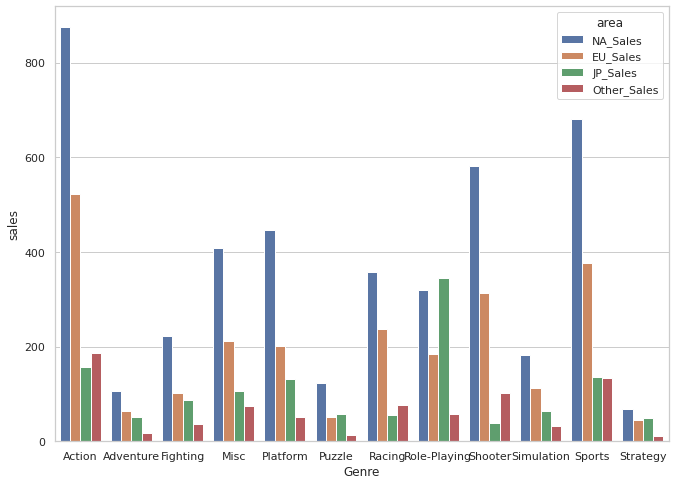

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.set_theme(style="whitegrid")
sns.barplot(x='Genre', y='sales', hue='area', data=df_melt)

북미 매출은 Action, Sports, Shooter 순으로 매출이 많고

유럽 지역은 Action, Sport, Shooter

일본 지역은 Role-playing, Action, Sports 

다른 지역은 Action, Sports, Shooter 이다.

**일본 지역이 특이하게 Role-playing 순위가 높다는 것을 알 수 있다.**

In [ ]:
# 연도별 게임의 트렌드가 있을까?

In [87]:
# 필요한 데이터만 추출, 연도, 플랫폼과 연도, 장르를 각각 그룹한다.
df_y = df[['Platform', 'Year', 'Genre', 'NA_Sales', 'EU_Sales',	'JP_Sales', 'Other_Sales']]
df_y
df_groupby_year_p = df_y.groupby(['Year', 'Platform'])
df_groupby_year_p = df_groupby_year_p.sum()
df_groupby_year_g = df_y.groupby(['Year', 'Genre'])
df_groupby_year_g = df_groupby_year_g.sum()

In [88]:
# 나라별 매출을 다 합쳐서 데이터를 만든다.
df_groupby_year_p['total_Sales'] = df_groupby_year_p['NA_Sales']+df_groupby_year_p['EU_Sales']+df_groupby_year_p['JP_Sales']+df_groupby_year_p['Other_Sales']
df_groupby_year_p = df_groupby_year_p.reset_index()
df_groupby_year_g['total_Sales'] = df_groupby_year_g['NA_Sales']+df_groupby_year_g['EU_Sales']+df_groupby_year_g['JP_Sales']+df_groupby_year_g['Other_Sales']
df_groupby_year_g = df_groupby_year_g.reset_index()

In [89]:
df_groupby_year_g


,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales
0,1980.0,Action,0.32,0.02,0.00,0.00,0.34
1,1980.0,Fighting,0.72,0.04,0.00,0.01,0.77
2,1980.0,Misc,2.53,0.15,0.00,0.02,2.70
3,1980.0,Shooter,6.56,0.43,0.00,0.08,7.07
4,1981.0,Action,13.86,0.81,0.00,0.12,14.79
...,...,...,...,...,...,...,...
383,2016.0,Sports,4.57,7.36,0.78,1.92,14.63
384,2016.0,Strategy,0.11,0.32,0.05,0.04,0.52
385,2017.0,Action,0.00,0.00,0.01,0.00,0.01
386,2017.0,Role-Playing,0.00,0.00,0.04,0.00,0.04


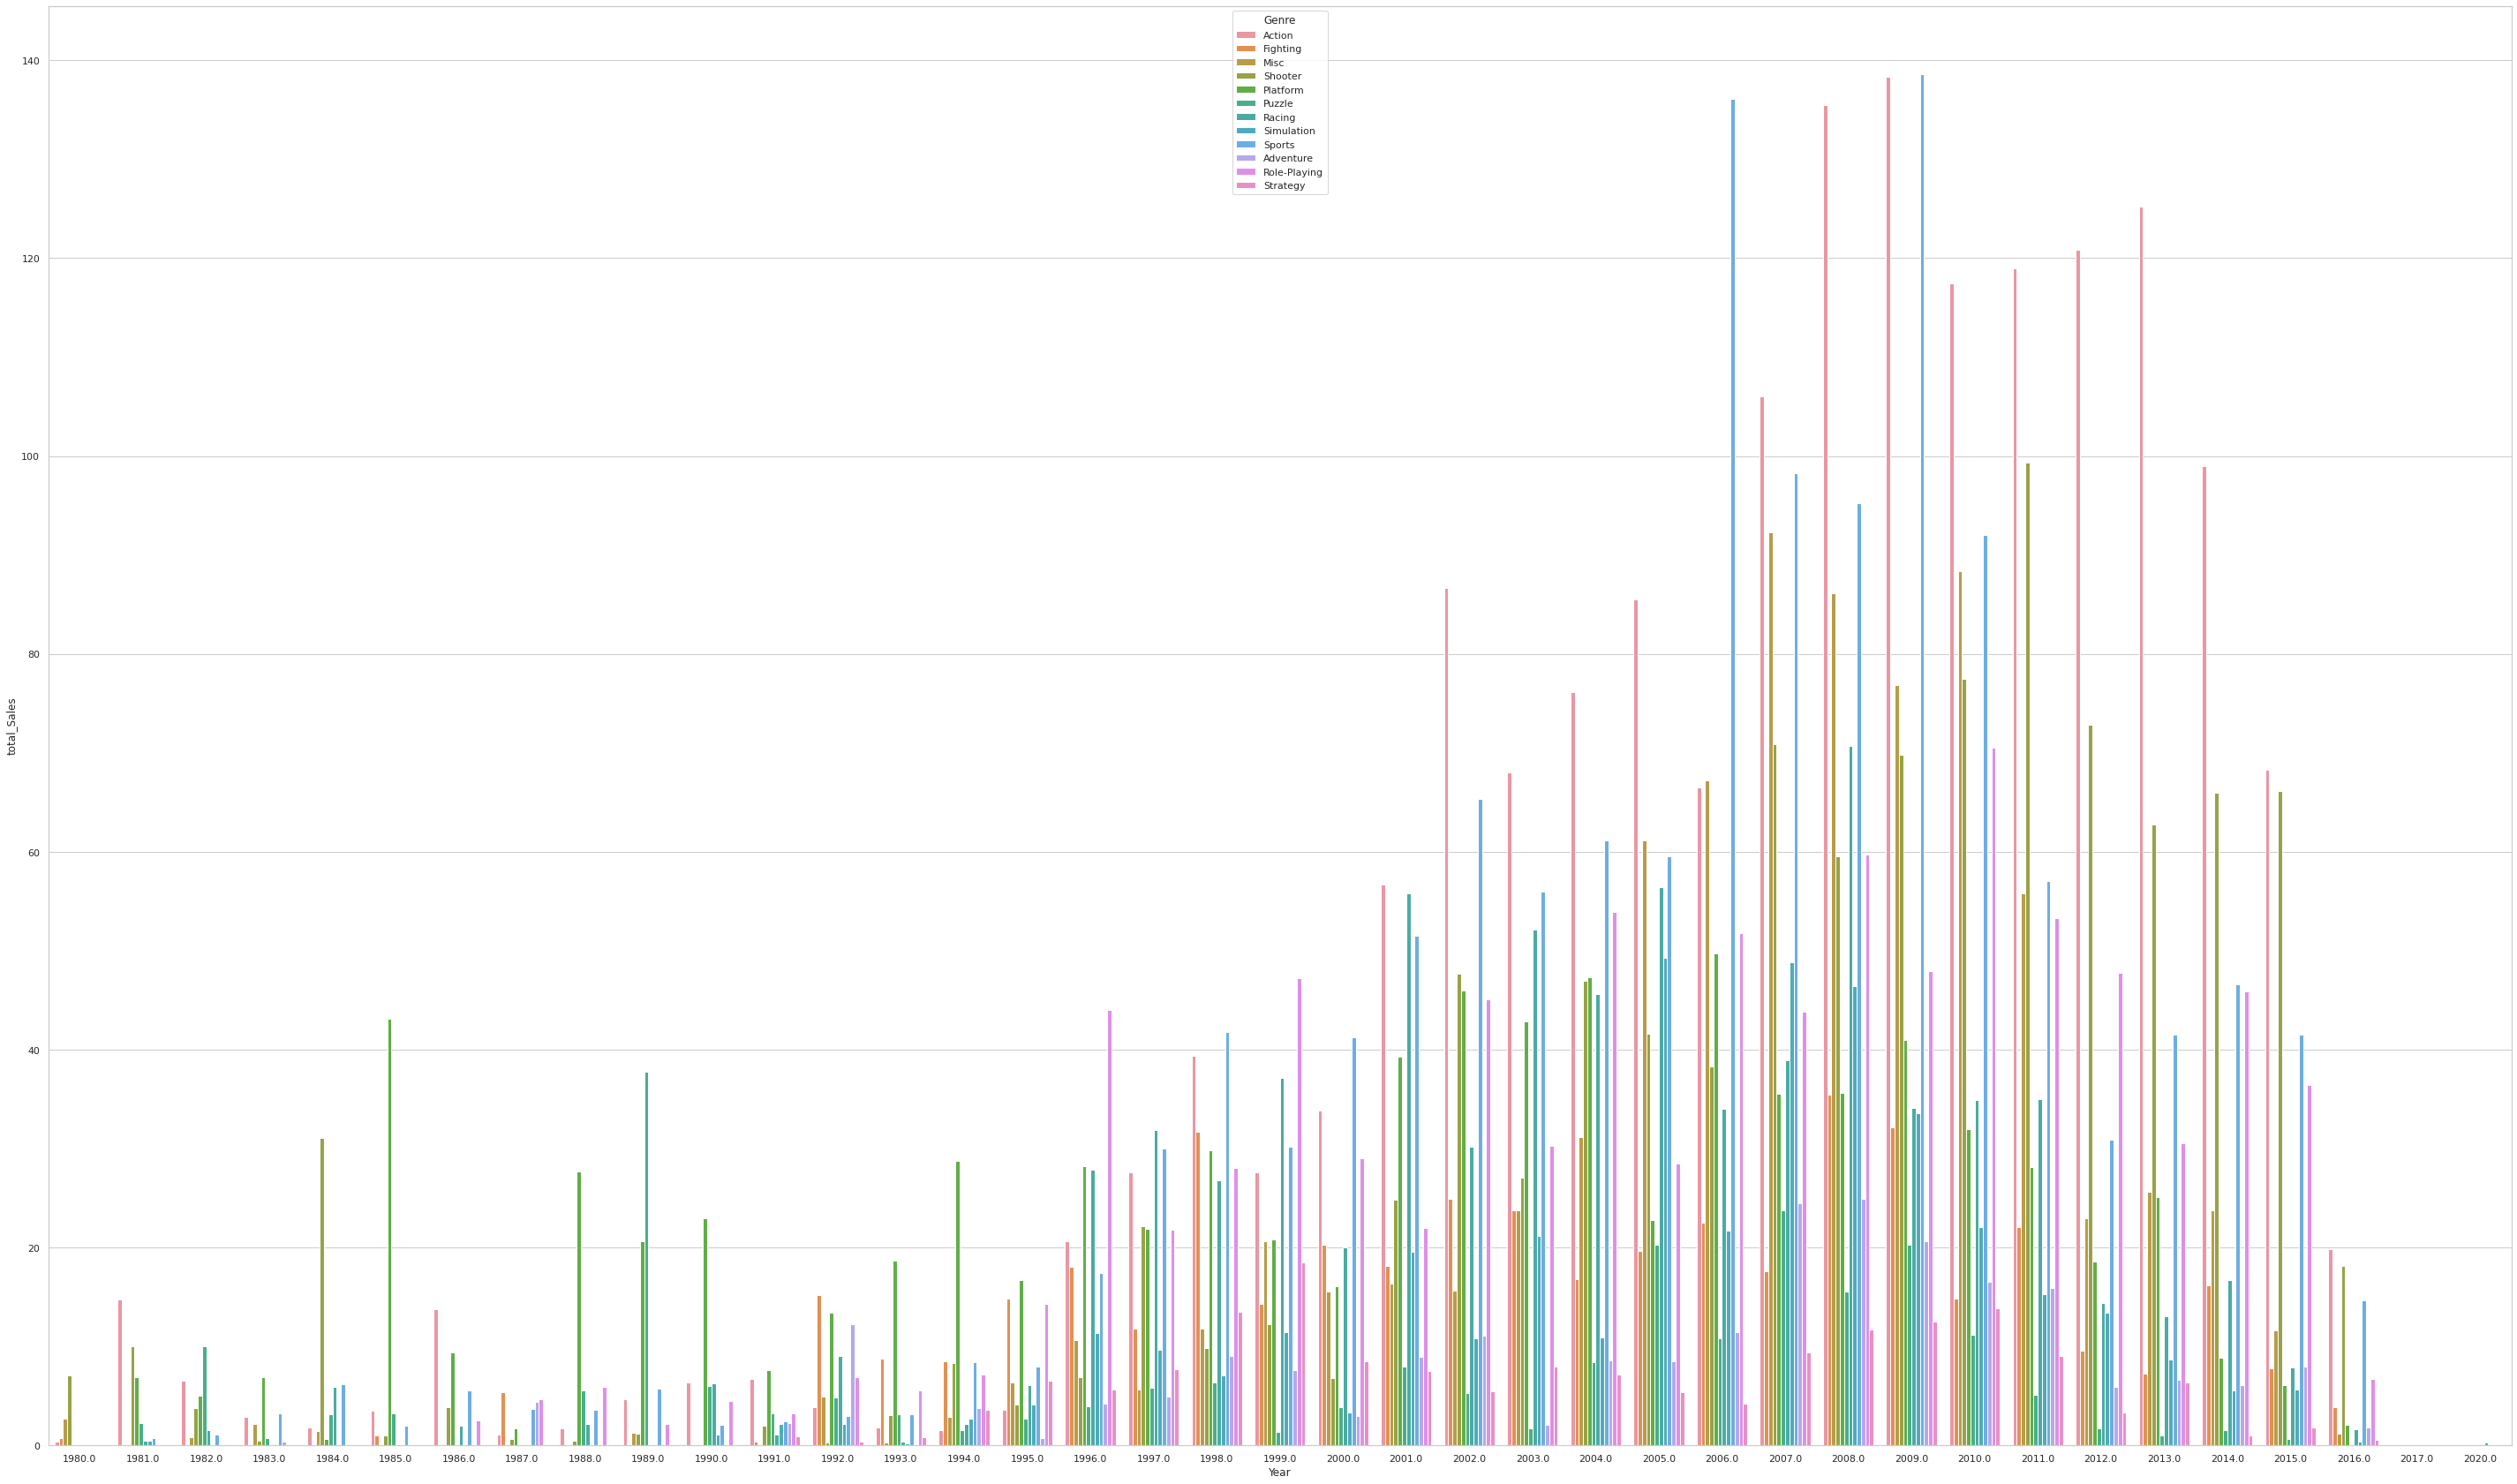

In [96]:
fig, ax = plt.subplots()
fig.set_size_inches(50, 30)
sns.set_theme(style="whitegrid")
sns.barplot(x='Year', y='total_Sales', hue='Genre', data=df_groupby_year_g)

1980년대는 platform 이 주를 이뤘고
1990년대 후반 ~ 200년대 초반에는 는 Action이 높아졌고
2000년대 후반으로 갈 수록 sport의 비율이 높아졌다.

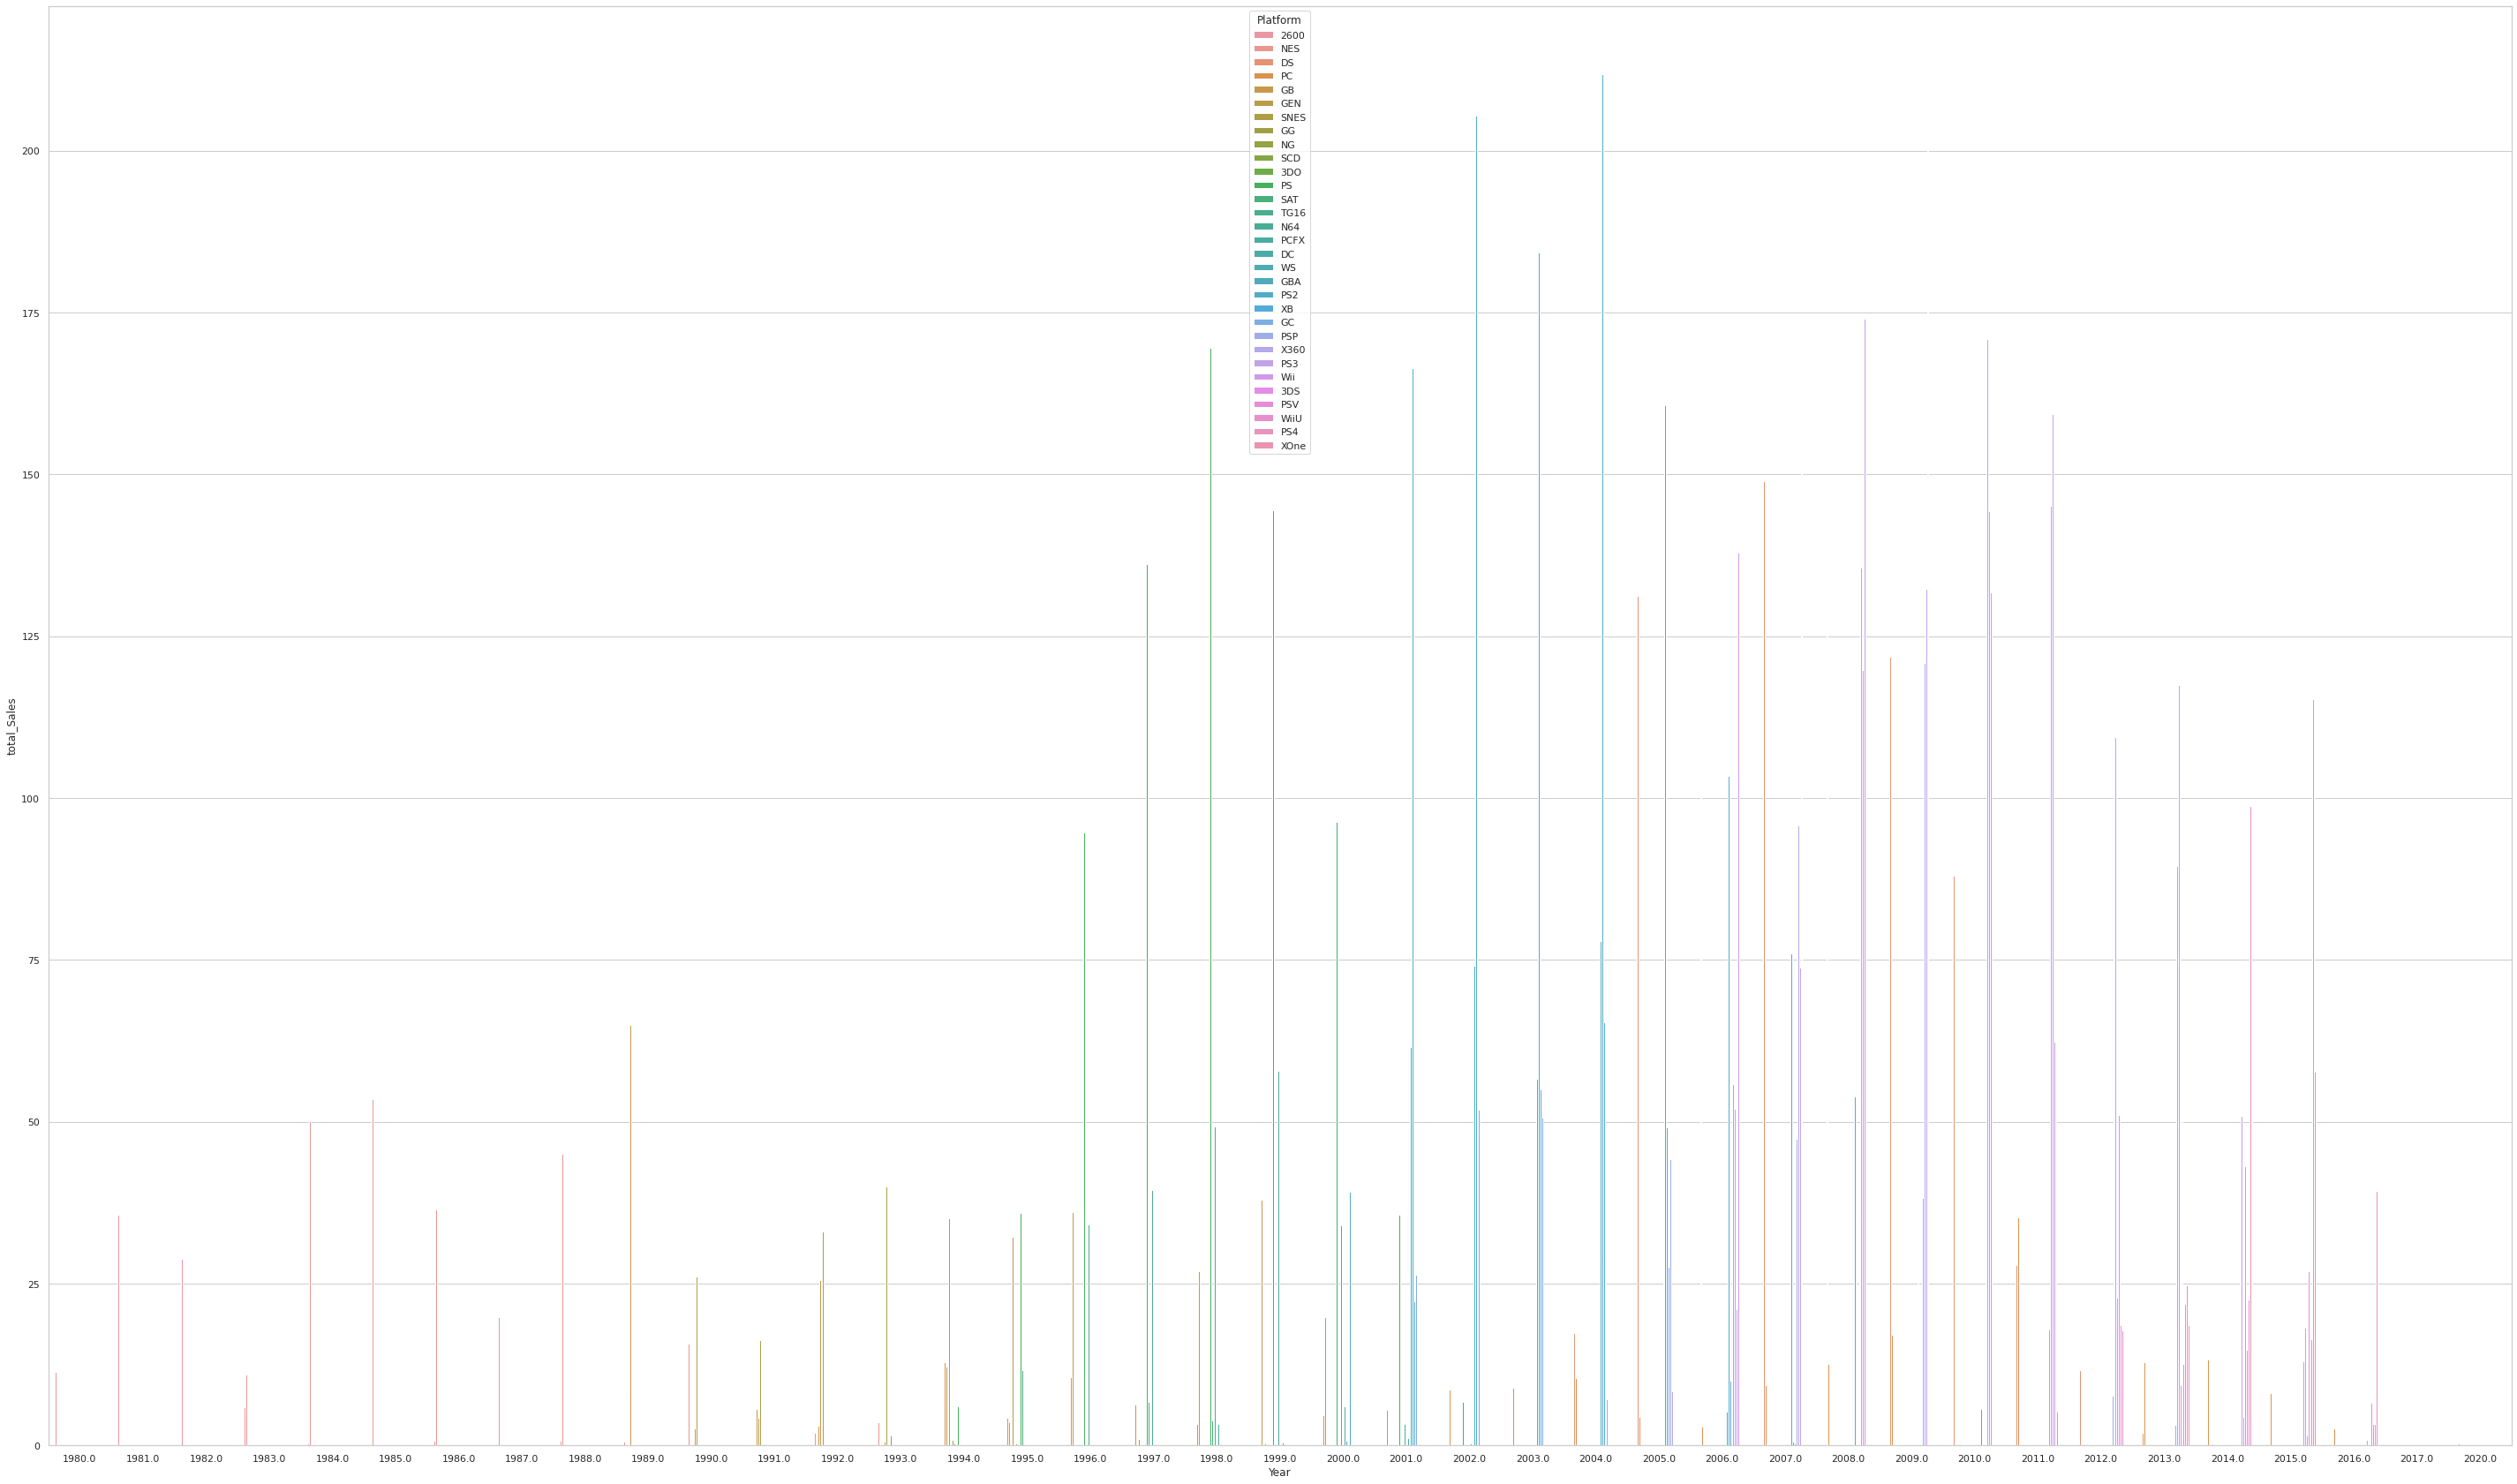

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches(50, 30)
sns.set_theme(style="whitegrid")
sns.barplot(x='Year', y='total_Sales', hue='Platform', data=df_groupby_year_p)

플랫폼을 보면 정렬 순으로 증가됨을 알 수 있다.

In [ ]:
# 매출이 높은 게임에 대한 분석 및 시각화 프로세스

In [149]:
# total_sales 만든다.
df2= df.copy()
df2['total_Sales'] = df2['NA_Sales']+df2['EU_Sales']+df2['JP_Sales']+df2['Other_Sales']
df2_g = df2.groupby(['Name'])

In [150]:
df2_g = df2_g.sum().sort_values(by=['total_Sales'], ascending=False)

In [151]:
df2_g = df2_g.reset_index()

In [152]:
df2_g.head(10)
df2_g = df2_g.drop(['Unnamed: 0', 'Year'], axis=1)
df2_g = df2_g.head(10)

In [165]:
df2_g = df2_g.set_index('Name')
df2_g

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales
Name,,,,,
Wii Sports,41.49,29.02,3.77,8.46,82.74
Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92
Super Mario Bros.,32.48,4.88,6.96,0.99,45.31
Tetris,26.17,2.95,6.03,0.69,35.84
Mario Kart Wii,15.85,12.88,3.79,3.31,35.83
Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.38
Call of Duty: Black Ops,17.59,9.50,0.59,3.36,31.04
Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.84


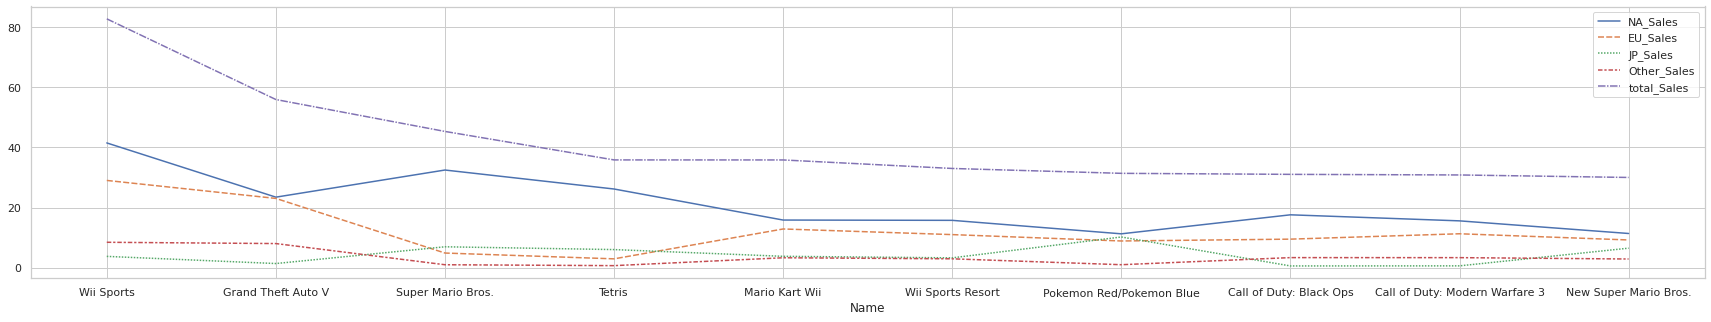

In [170]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 5)
sns.lineplot(data=df2_g)

상위 매출 10개의 게임에 대해 분석
will sports는 제일 매출이 높고 북미에서 가장 매출이 높다. 


1~2위 게임의 매출은 북미, 유럽순으로 높고
슈퍼마리오 게임, 테트리스 게임은 북미, 일본순으로 높다. 


상위 게임중 윌 게임, 슈퍼마리오 게임에 대한 것들이 절반정도를 차지하고 있기 때문에 슈퍼마리오, 윌의 매출이 높다는 것을 알 수 있다.

In [171]:
df2_g.cov()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_Sales
NA_Sales,96.290418,35.227124,-1.860011,11.625278,141.282809
EU_Sales,35.227124,63.254321,-9.759939,20.886617,109.608123
JP_Sales,-1.860011,-9.759939,9.700961,-4.638961,-6.557950
Other_Sales,11.625278,20.886617,-4.638961,7.366472,35.239406
total_Sales,141.282809,109.608123,-6.557950,35.239406,279.572388


상위 10개의 게임 중 일본의 매출은 타 나라의 양상과 다른 것을 알 수 있다.

In [185]:
df_groupby_genre = df_groupby_genre.set_index('Genre')
df_groupby_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,pc
Genre,,,,,
Action,874.81,522.16,157.90,186.45,3.969275
Adventure,105.66,64.05,51.95,16.81,-1.859483
Fighting,223.20,101.22,87.34,36.64,-1.116631
Misc,408.05,212.36,105.27,74.04,0.230739
Platform,446.44,201.61,130.65,51.53,0.099601
Puzzle,123.35,50.73,56.87,12.52,-1.905685
Racing,357.19,237.10,56.40,77.10,0.111248
Role-Playing,319.54,183.58,344.95,56.96,0.375149
Shooter,581.92,313.05,38.28,102.65,1.180199


In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_groupby_genre_scaled = scaler.fit_transform(df_groupby_genre)
pca = PCA(1)
pca.fit(df_groupby_genre_scaled)
df_pca = pca.transform(df_groupby_genre_scaled)
df_pca

array([[ 4.56855774],
       [-2.14022836],
       [-1.28522046],
       [ 0.26557619],
       [ 0.1146384 ],
       [-2.19340561],
       [ 0.12804376],
       [ 0.43178886],
       [ 1.35838604],
       [-1.47734115],
       [ 2.63404866],
       [-2.40484407]])

In [190]:
df_groupby_genre['pc'] = df_pca

In [193]:
df_groupby_genre.sort_values(by='pc', ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,pc
Genre,,,,,
Action,874.81,522.16,157.90,186.45,4.568558
Sports,680.52,376.48,135.37,134.67,2.634049
Shooter,581.92,313.05,38.28,102.65,1.358386
Role-Playing,319.54,183.58,344.95,56.96,0.431789
Misc,408.05,212.36,105.27,74.04,0.265576
Racing,357.19,237.10,56.40,77.10,0.128044
Platform,446.44,201.61,130.65,51.53,0.114638
Fighting,223.20,101.22,87.34,36.64,-1.285220
Simulation,182.96,113.35,63.70,31.48,-1.477341


액션, 스포츠, 총게임 순으로 매출이 가장 많다.